In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [41]:
#The baseballsavant website would not allow for multiple seasons to be downloaded at one with a max of two
#All of this data is pre-filtered into home run events in order to make the dataset managable and not too large
df = pd.read_csv('Home_Run_Data.csv')
mergeDF = pd.read_csv('MergedHR.csv')

#Built-in function which allows for the data in each csv to be appended onto one another, increasing the amount of data
ans = pd.concat([df,mergeDF], ignore_index = True)
ans.dropna(axis = 1, how = 'all', inplace = True)
ans.head(10)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name
0,FF,2022-10-05,89.2,2.43,5.40,"Vázquez, Christian"
1,SL,2022-10-05,91.1,-1.81,6.24,"Moreno, Gabriel"
2,SI,2022-10-05,90.7,2.03,5.69,"Torrens, Luis"
3,FF,2022-10-05,93.6,-1.58,6.33,"Choi, Ji-Man"
4,CU,2022-10-05,78.5,-1.77,5.39,"McCann, James"
...,...,...,...,...,...,...
20234,NaN,2019-03-20,NaN,NaN,NaN,"Santana, Domingo"
20235,NaN,2019-03-20,NaN,NaN,NaN,"Davis, Khris"
20236,NaN,2019-03-20,NaN,NaN,NaN,"Chapman, Matt"
20237,NaN,2019-03-20,NaN,NaN,NaN,"Beckham, Tim"


In [69]:
ans.keys()

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'zone', 'des', 'game_type', 'stand', 'p_throws',
       'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls',
       'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b',
       'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x',
       'hc_y', 'fielder_2', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 

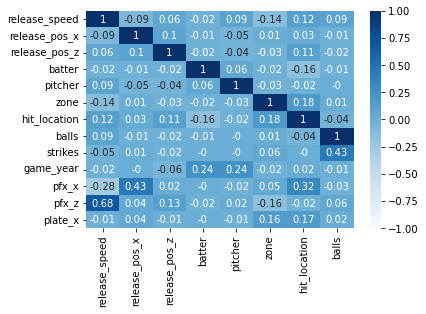

<Figure size 1800x720 with 0 Axes>

In [68]:
#Before we start, we want to see if there is a correlation between any variables
#Initially, there were too many variables to make the corr matrix readable, so we have to minimize 
corrMatrix = round(ans.corr(), 2)
corrMatrix = corrMatrix.loc['release_speed':'plate_x']
corrMatrix = corrMatrix[corrMatrix.columns[0:8]]
sns.heatmap(corrMatrix, annot = True, vmin = -1, vmax = 1, cmap ='Blues')
plt.figure(figsize = (25,10))
plt.show()

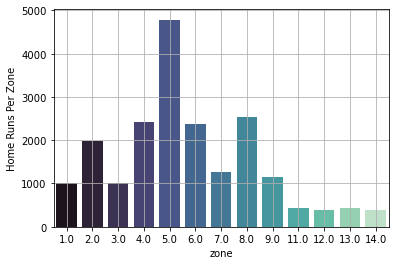

In [17]:
#Create a distribution plot of the amount of homeruns in a specific zone
sns.countplot(data = ans, x = 'zone', palette = 'mako')
plt.ylabel('Home Runs Per Zone')
plt.grid()
#As we can see below, the greatest number of homeruns occur in zone 5 which is in the middle of the strike zone

<AxesSubplot:xlabel='zone', ylabel='count'>

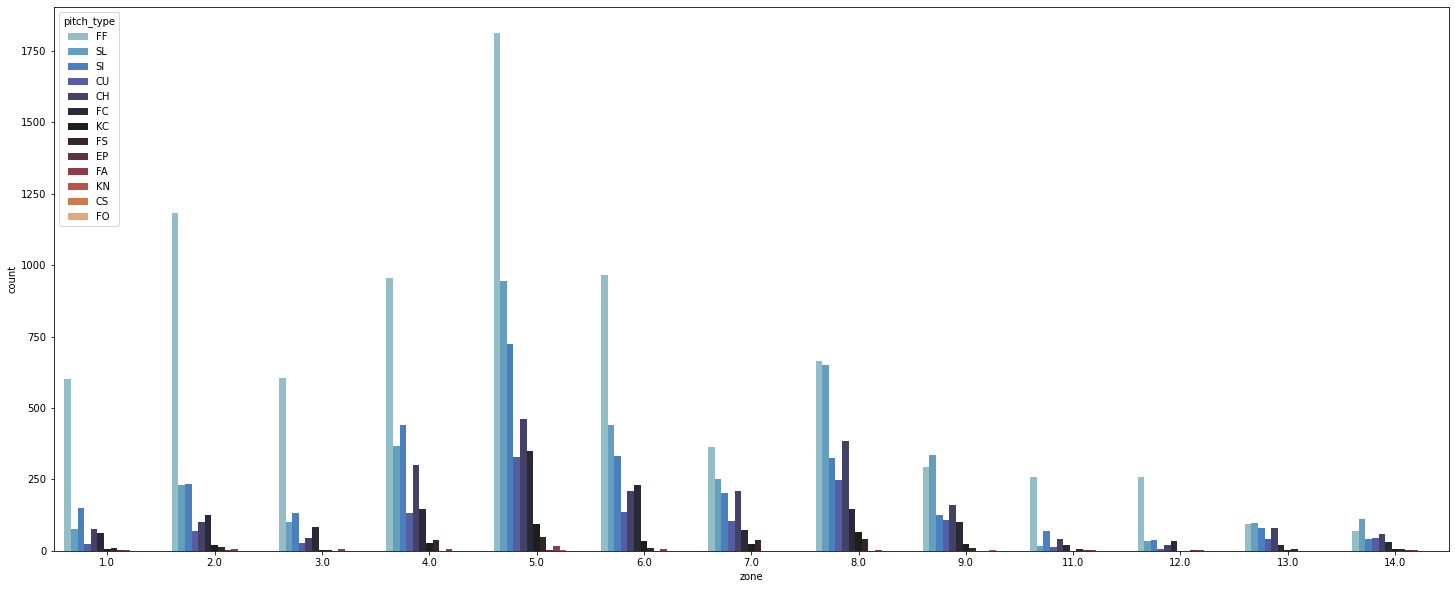

In [80]:
#Figure was too small and data was bunched up initially, so I increased the length and width of the plot
plt.figure(figsize = (25,10))
sns.countplot(data = ans, x = 'zone', palette = 'icefire', hue = 'pitch_type')
#With this graph we are able to determine the number of homeruns in each zone, corresponding to the specific type of pitch

In [170]:
def comparePlayers(df, playerName1, playerName2):
    
    #Creates two plots, sharing the same margin to give the user a comparison of baseball players
    fig, axes = plt.subplots(1, 2, figsize = (10,5), sharey = True)
    plt.subplots_adjust(hspace = None)

    #Removes the left spine of the plot as a lot of the data was on top of eachother
    sns.despine(left = True)
    
    #Distribution plot to break down the amount of homeruns in a specific zone
    sns.countplot(data = df[df['player_name'] == playerName1], x = 'zone', palette = 'icefire', ax = axes[0])
    axes[0].set_ylabel('Home Runs Per Zone')
    axes[0].set_title(f"Distribution of Home Runs for {playerName1}")
    
    #Distribution plot of the second player to show the amount of homeruns in a zone
    sns.countplot(data = df[df['player_name'] == playerName2], x = 'zone', palette = 'icefire', ax = axes[1])
    axes[1].set_ylabel("")
    axes[1].set_title(f"Distribution of Home Runs for {playerName2}")
    
    axes[0].grid()
    axes[1].grid()

    plt.show()
    

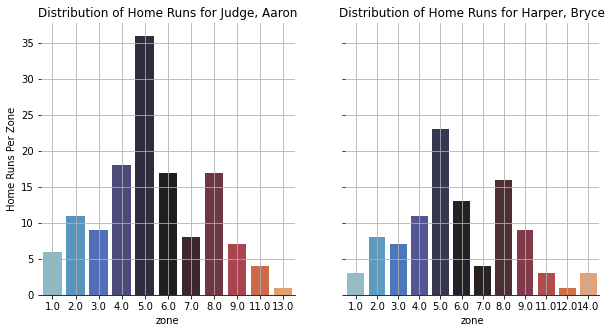

In [171]:
comparePlayers(ans,'Judge, Aaron','Harper, Bryce')

In [193]:
def homeRunsbyZone(df, playerName):
    '''
    Creates a dataframe, searching for the specific player name in the original data frame. For each zone and player
    in the dataframe, it will count the number of home runs. It will then filter by a specific player to return the final dataset
    Inputs: 
    df (pandas DataFrame): will subset the data to return a grouped dataframe given certain factors
    playerName (string): searches for a specific player within the dataframe
    '''
    
    #Calculates the number of homeruns per zone per player
    df2 = pd.DataFrame(ans.groupby(['zone','player_name'])['events'].agg('count'))
    #Renames the resulting column instead of having a generic 'count'
    df2.rename({'events':'Home Runs Per Zone'}, axis = 1, inplace = True)
    #Makes accessing individual elements easier
    df2.reset_index(inplace=True)
    #Filters by name to only get the data relevant to the player searched
    df2 = df2[(df2['player_name'] == playerName)]
    return df2

test = homeRunsbyZone(ans, 'Harper, Bryce')


,zone,player_name,Home Runs Per Zone
167,1.0,"Harper, Bryce",3
641,2.0,"Harper, Bryce",8
1132,3.0,"Harper, Bryce",7
1606,4.0,"Harper, Bryce",11
2223,5.0,"Harper, Bryce",23
2867,6.0,"Harper, Bryce",13
3375,7.0,"Harper, Bryce",4
3841,8.0,"Harper, Bryce",16
4343,9.0,"Harper, Bryce",9
4699,11.0,"Harper, Bryce",3


In [177]:
def plotHeatMap(df, playerName):
    
    if df['player_name'].str.contains(playerName).any():
        df = df[(df['player_name'].str.contains(playerName)) & (df['zone'].between(0,9))].reset_index().copy()
        playerName = df['player_name'].iloc[0]
    else:
        print("Please enter a valid player")
        return

    def x_coord(col):
        if col['zone'] in [1,4,7]:
            return 1
        elif col['zone'] in [2,5,8]:
            return 2
        elif col['zone'] in [3,6,9]:
            return 3

    def y_coord(row):
        if row['zone'] in [1,2,3]:
            return 3
        elif row['zone'] in [4,5,6]:
            return 2
        elif row['zone'] in [7,8,9]:
            return 1
    
    
    df['xcoord'] = df.apply(x_coord, axis = 1)
    df['ycoord'] = df.apply(y_coord, axis = 1)

    ax = sns.histplot(data = df, x  = 'xcoord', y = 'ycoord', discrete = True, cmap ='Reds',cbar = True)
    sns.despine(left=True, bottom = True)
    ax.set(yticks=[], xticks = [])
    ax.set_xlabel('Zone')
    ax.set_ylabel("")
    ax.set_title(f"Home Run Distribution for {playerName}")
    count = 0
    
    for y in range(1, 4):
        for x in range(1,4):
            count += 1
            plt.text(x, y, count, horizontalalignment='center', size='medium', color='grey', weight='heavy')
    plt.show()

    

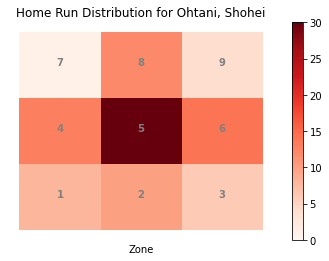

In [197]:
plotHeatMap(ans, 'Shohei')

In [166]:
#How does a player's launch speed and distance change throughout the seasons (2019-2022)
def launchOverTimeTop(df, top):
    top10Hitters = pd.DataFrame(df.groupby('player_name')['events'].agg('count'))
    top10Hitters.rename({'events':'Home Runs'}, axis = 1, inplace = True)
    top10Hitters.reset_index(inplace=True)
    top10Hitters = top10Hitters.sort_values(by = 'Home Runs', ascending = False).head(top)
    
    fig, axes = plt.subplots(2, top//2, figsize = (10,5), sharey = True)
    
    top10Hitters['player_name'] in df['player_name']

    for i in range(top):
        sns.lineplot(data = top10Hitters, x = 'game_date', y = 'launch_speed', hue = 'game_year', ax = axes[i])
    ax.set(xticks = [])
    plt.show()

In [174]:
top10Hitters = pd.DataFrame(df.groupby('player_name')['events'].agg('count'))
top10Hitters.rename({'events':'Home Runs'}, axis = 1, inplace = True)
top10Hitters.reset_index(inplace=True)
top10Hitters = top10Hitters.sort_values(by = 'Home Runs', ascending = False).head(10)
top10Hitters['player_name'].values in df['player_name']


TypeError: unhashable type: 'numpy.ndarray'